In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
from cleanMDA import extractTable, divide_chunks, pullMDA, getXy
from text_analysis import text_analysis_wordall, text_analysis_sentenceall, get_polarity, low_subjectivity, model_analysis
from textblob import TextBlob
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Sentiment Analysis by Word

In [121]:
# company name and text in dataframe
df_sentences = pd.read_pickle('Cleaned_MDA_sentences.pkl')

In [122]:
# combine the company's text for each year and add the GDP of each year for word analysis
df = getXy(df_sentences) 

In [123]:
# call the function text_analysis_wordall on the MDA text df
analysis_df = text_analysis_wordall(df)
analysis_df

,X,y
2007,"[(frequently, 0.1, 0.3), (other, -0.125, 0.375...",1.77857
2008,"[(frequently, 0.1, 0.3), (other, -0.125, 0.375...",-0.291621
2009,"[(frequently, 0.1, 0.3), (other, -0.125, 0.375...",-2.77553
2010,"[(frequently, 0.1, 0.3), (other, -0.125, 0.375...",2.53192
2011,"[(frequently, 0.1, 0.3), (other, -0.125, 0.375...",1.60145
2012,"[(other, -0.125, 0.375), (certain, 0.214285714...",2.22403
2013,"[(other, -0.125, 0.375), (certain, 0.214285714...",1.67733
2014,"[(other, -0.125, 0.375), (certain, 0.214285714...",2.56919
2015,"[(other, -0.125, 0.375), (certain, 0.214285714...",2.86159
2016,"[(other, -0.125, 0.375), (certain, 0.214285714...",1.48528


In [124]:
analysis_df.to_pickle('word_analysis.pkl')

## Sentiment Analysis by Sentence

In [125]:
# combine the company's text for each year and add the GDP of each year for sentence analysis
df2 = getXy(df_sentences)

In [126]:
# call the function text_analysis_sentenceall on the MDA text df
analysis_sentence = text_analysis_sentenceall(df2)
analysis_sentence

,X,y
2007,[( table of index to financial statements fina...,1.77857
2008,[( table of index to financial statements this...,-0.291621
2009,[( table of index to financial statements fina...,-2.77553
2010,[( table of index to financial statements fina...,2.53192
2011,[( table of index to financial statements this...,1.60145
2012,[(management discussion and analysis of financ...,2.22403
2013,[(management discussion and analysis of financ...,1.67733
2014,[(management discussion and analysis of financ...,2.56919
2015,[(management discussion and analysis of financ...,2.86159
2016,[(management discussion and analysis of financ...,1.48528


In [127]:
analysis_sentence.to_pickle('sentence_analysis.pkl')

## Get just the polarity score from the sentence and word analysis

In [128]:
analysis_word = pd.read_pickle('word_analysis.pkl')
analysis_sentence = pd.read_pickle('sentence_analysis.pkl')

In [129]:
# call the function get_polarity on the word analysis df
word_polarity = get_polarity(analysis_word)
word_polarity

,X,y
2007,"[0.1, -0.125, -0.2, -0.05, -0.05, -0.125, -0.1...",1.77857
2008,"[0.1, -0.125, -0.2, 0.7, -0.05, -0.05, -0.125,...",-0.291621
2009,"[0.1, -0.125, -0.2, -0.05, -0.05, -0.125, -0.1...",-2.77553
2010,"[0.1, -0.125, -0.2, -0.05, -0.05, -0.125, -0.1...",2.53192
2011,"[0.1, -0.125, -0.2, -0.05, -0.05, -0.125, -0.1...",1.60145
2012,"[-0.125, 0.21428571428571427, 0.1, 0.375, -0.0...",2.22403
2013,"[-0.125, 0.21428571428571427, 0.1, 0.375, -0.0...",1.67733
2014,"[-0.125, 0.21428571428571427, 0.1, 0.375, -0.0...",2.56919
2015,"[-0.125, 0.21428571428571427, 0.1, 0.375, -0.0...",2.86159
2016,"[-0.125, 0.21428571428571427, 0.1, 0.375, -0.0...",1.48528


In [130]:
# call the function get_polarity on the sentence analysis df
sentence_polarity = get_polarity(analysis_sentence)
sentence_polarity

,X,y
2007,"[-0.0140625, -0.05, -0.05, -0.125, -0.06666666...",1.77857
2008,"[-0.011842105263157895, 0.7, -0.05, -0.05, -0....",-0.291621
2009,"[-0.0140625, -0.05, -0.05, -0.125, -0.06666666...",-2.77553
2010,"[-0.016071428571428573, -0.05, -0.05, -0.125, ...",2.53192
2011,"[-0.013235294117647059, -0.05, -0.05, -0.125, ...",1.60145
2012,"[-0.041666666666666664, 0.027380952380952377, ...",2.22403
2013,"[-0.041666666666666664, 0.027380952380952377, ...",1.67733
2014,"[-0.041666666666666664, 0.027380952380952377, ...",2.56919
2015,"[-0.041666666666666664, 0.027380952380952377, ...",2.86159
2016,"[-0.041666666666666664, 0.027380952380952377, ...",1.48528


# Model Analysis

### Words

In [131]:
# split Xs into individual columns and run analysis
word_split_Xs = pd.DataFrame(word_polarity.X.tolist())
word_split = model_analysis(np.array(word_split_Xs),np.array(word_polarity['y']))

# get the sum of all the scores for each year and run analysis
summed_word = np.array(word_polarity['X'].map(lambda x: sum(x)))
Sum_word = model_analysis(summed_word,np.array(word_polarity['y']))

[12:17:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Sentences

In [132]:
# split Xs into individual columns and run analysis
sentences_split_Xs = pd.DataFrame(sentence_polarity.X.tolist())
sentence_split = model_analysis(np.array(sentences_split_Xs),np.array(sentence_polarity['y']))

# get the sum of all the scores for each year and run analysis
summed_sentence = np.array(sentence_polarity['X'].map(lambda x: sum(x)))
Sum_sentence = model_analysis(summed_sentence,np.array(sentence_polarity['y']))

[12:18:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:18:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


## Look at all four of the Models to determine the best score

In [133]:
models = [word_split,Sum_word,sentence_split,Sum_sentence]
name = ['word_split','Sum_word','sentence_split','Sum_sentence']
for i in range(len(models)):
    print(name[i],models[i][2])

word_split -14.00501376563017
Sum_word -1.5412611237579816
sentence_split -6.467280047393677
Sum_sentence -1.8563084104948013


# Final Model

Since the best model from the code above we found was the Sum_word, we see if we can fit the model better by editing the parameters of subjectivity and polarity scores

In [2]:
analysis_word = pd.read_pickle('word_analysis.pkl')

In [3]:
# the best parameters of the dataset for the model
word_polarity_low = low_subjectivity(analysis_word)

In [7]:
# get the sum of all the scores for each year
summed_word_low = np.array(word_polarity_low['X'].map(lambda x: sum(x)))
Sum_word_best = model_analysis(summed_word_low,np.array(word_polarity_low['y']))
print('Best score: ',Sum_word_best[2])
print('MAE: ', Sum_word_best[4])
print('Actual y: ',Sum_word_best[5],'Predicted y: ',Sum_word_best[3])

[12:27:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best score:  0.48816836575278644
MAE:  0.1713248336954345
Actual y:  [2.861587025 2.273338548] Predicted y:  [2.5680907 2.2241852]


## Visualization of Score Distribution from 2007-2017

In [8]:
# split Xs into individual columns
split_Xs = pd.DataFrame(word_polarity_low.X.tolist())
split_Xs.fillna(value=-2, inplace=True)

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2007')

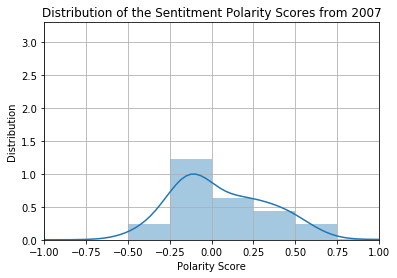

In [9]:
sns.distplot(split_Xs.iloc[:1],bins=12)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2007')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2008')

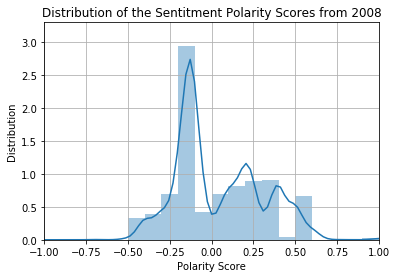

In [10]:
sns.distplot(split_Xs.iloc[1:2],bins=30)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2008')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2009')

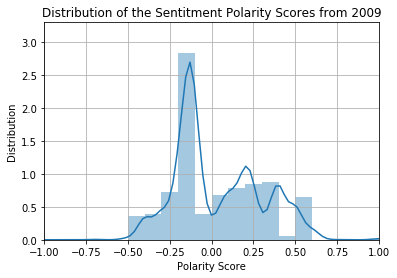

In [11]:
sns.distplot(split_Xs.iloc[2:3],bins=30)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2009')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2010')

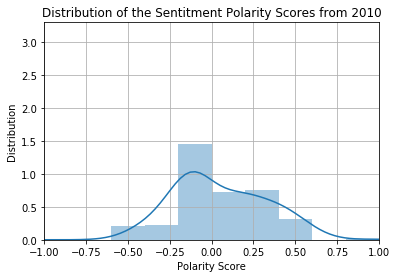

In [12]:
sns.distplot(split_Xs.iloc[3:4],bins=15)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2010')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2011')

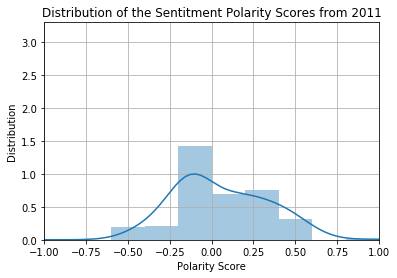

In [13]:
sns.distplot(split_Xs.iloc[4:5],bins=15)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2011')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2012')

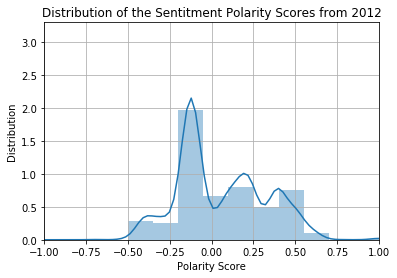

In [14]:
sns.distplot(split_Xs.iloc[5:6],bins=20)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2012')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2013')

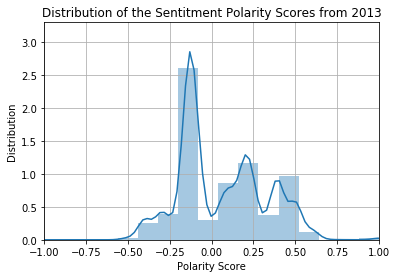

In [15]:
sns.distplot(split_Xs.iloc[6:7],bins=25)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2013')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2014')

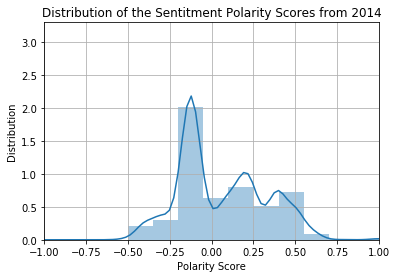

In [16]:
sns.distplot(split_Xs.iloc[7:8],bins=20)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2014')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2015')

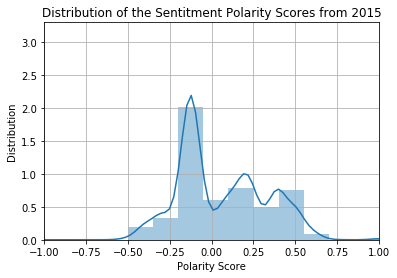

In [17]:
sns.distplot(split_Xs.iloc[8:9],bins=20)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2015')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2016')

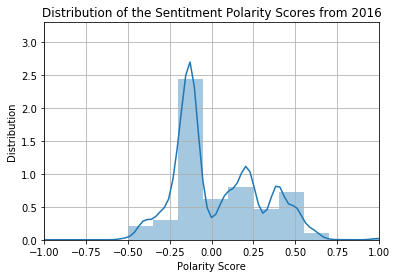

In [18]:
sns.distplot(split_Xs.iloc[9:10],bins=20)
plt.xlim(-1, 1)
plt.ylim(None,3.3)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2016')

Text(0.5, 1.0, 'Distribution of the Sentitment Polarity Scores from 2017')

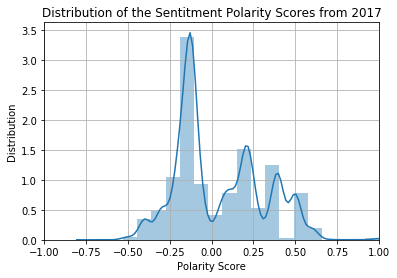

In [19]:
sns.distplot(split_Xs.iloc[10:],bins=20)
plt.xlim(-1, 1)
plt.grid(True)
plt.xlabel('Polarity Score')
plt.ylabel('Distribution')
plt.title('Distribution of the Sentitment Polarity Scores from 2017')

## Table of the Count of Words throughout the analysis proccess

In [22]:
# get word count before any analysis was done
words_before = pd.read_pickle('Cleaned_MDA.pkl')
words_before = getXy(words_before)
count_before = np.array(words_before['X'].map(lambda x: len(x.split(' '))))

In [23]:
# get word count after taking out all the polarity = 0 scores
words_during = pd.read_pickle('word_analysis.pkl')
count_during = np.array(words_during['X'].map(lambda x: len(x)))

In [25]:
# get word count from best dataset for model
count_after = np.array(word_polarity_low['X'].map(lambda x: len(x)))

In [26]:
# create counts df of all the different word counts
counts = pd.DataFrame(index=['Word Count'])
counts['Before Analysis'] = sum(count_before)
counts['During Analysis'] = sum(count_during)
counts['Final Analysis'] = sum(count_after)

In [27]:
# find the number of words dropped
counts = counts.transpose()
counts['Words Dropped'] = [0,counts['Word Count'][0] - counts['Word Count'][1],counts['Word Count'][1] - counts['Word Count'][2]]

In [28]:
counts

,Word Count,Words Dropped
Before Analysis,2999162,0
During Analysis,241435,2757727
Final Analysis,218814,22621
